In [112]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# for showing all the plots inline
%matplotlib inline

# Load dataset


In [113]:
# loading dataset from dprep in Workbench    
# dfTickets = package.run('AllTickets.dprep', dataflow_idx=0) 

# loading dataset from csv
Tickets = pd.read_csv(
    'all_ticketsnew.csv',
    dtype=str
)

Tickets = Tickets.drop(['title','category','sub_category1','sub_category2','business_service','urgency','impact','body-tokenized'],axis=1)

# Extracting features from text¶


In [114]:
def extract_features(df,field,training_data,testing_data,type="binary"):
    """Extract features using different methods"""
    
    #logging.info("Extracting features and creating vocabulary...")
    
    if "binary" in type:
        
        # BINARY FEATURE REPRESENTATION
        cv= CountVectorizer(binary=True, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data.values)
        test_feature_set=cv.transform(testing_data.values)
        
        return train_feature_set,test_feature_set,cv
  
    elif "counts" in type:
        
        # COUNT BASED FEATURE REPRESENTATION
        cv= CountVectorizer(binary=False, max_df=0.95)
        cv.fit_transform(training_data.values)
        
        train_feature_set=cv.transform(training_data.values)
        test_feature_set=cv.transform(testing_data.values)
        
        return train_feature_set,test_feature_set,cv
    
    else:    
        
        # TF-IDF BASED FEATURE REPRESENTATION
        tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
        tfidf_vectorizer.fit_transform(training_data[field].values)
        
        train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
        test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,tfidf_vectorizer

In [115]:
# GET A TRAIN TEST SPLIT (set seed for consistent results)
training_data, testing_data = train_test_split(Tickets,random_state = 2000)

# GET LABELS
Y_train=training_data['ticket_type'].values
Y_test=testing_data['ticket_type'].values

# GET FEATURES
X_train,X_test,feature_transformer=extract_features(data,'body',training_data,testing_data,type='feature_rep')

In [116]:
# INIT LOGISTIC REGRESSION CLASSIFIER
print("Training a Logistic Regression Model...")
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(X_train,Y_train)

Training a Logistic Regression Model...
[LibLinear]

In [117]:
# Predict dependent variable using the fitted model
y_pred = scikit_log_reg.predict(X_test)

In [118]:
#Calculate f1-score

f1_metric = f1_score(Y_test, y_pred, average = "macro")
f1_metric


0.9927855639955779

In [119]:
#confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix


array([[3474,   67],
       [   5, 8592]], dtype=int64)

# Ploting confusion matrix¶


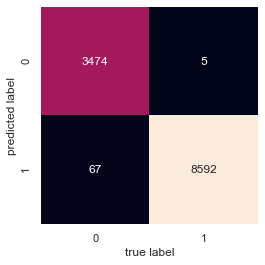

In [120]:
# Ploting confusion matrix with 'seaborn' module
# Use below line only with Jupyter Notebook
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
mat = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_test))
plt.xlabel('true label')
plt.ylabel('predicted label')
# Save confusion matrix to outputs in Workbench
# plt.savefig(os.path.join('.', 'outputs', 'confusion_matrix.png'))
plt.show()

# Printing classification report¶


In [121]:
%matplotlib inline
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred,
                            target_names=np.unique(Y_test.tolist())))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3541
           1       0.99      1.00      1.00      8597

    accuracy                           0.99     12138
   macro avg       1.00      0.99      0.99     12138
weighted avg       0.99      0.99      0.99     12138

